# Objective

The goal is to perform a comprehensive analysis and predictive modeling on a loan dataset. The dataset includes various features such as credit policy, purpose of the loan, interest rate, installment amount, credit score (FICO), debt-to-income ratio (DTI), and other relevant financial indicators.

The dataset consists of information related to individual loans. Each row represents a unique loan, and the columns capture various financial and credit-related attributes. Here's a brief overview of the key columns:

##### credit.policy: 
Binary variable (1 or 0) indicating whether the customer meets the credit underwriting criteria.

##### purpose:
Categorical variable specifying the purpose of the loan (e.g., debt consolidation, credit card, home improvement).

##### int.rate:
Interest rate for the loan, expressed as a decimal.

##### installment:
Monthly installment amount to be paid by the borrower.

##### log.annual.inc:
Natural logarithm of the borrower's annual income.

##### dti:
Debt-to-income ratio, representing the percentage of monthly debt payments relative to gross income.

##### fico:
FICO credit score, a numerical representation of creditworthiness.

##### days.with.cr.line:
Number of days the borrower has had a credit line.

##### revol.bal:
Revolving balance, the amount owed on a revolving credit account.

##### revol.util:
Revolving utilization rate, the ratio of revolving credit balances to credit limits.

##### inq.last.6mths:
Number of inquiries made by creditors in the last 6 months.

##### delinq.2yrs:
Number of times the borrower has been 30+ days past due in the last 2 years.

##### pub.rec:
Number of derogatory public records on the credit report.

##### not.fully.paid:
Binary variable (1 or 0) indicating whether the loan was not fully paid.




### Importing necessary libraries

In [144]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the dataset

In [145]:
df = pd.read_csv('loan_data.csv')

# Exploratory Data Analysis (EDA)

### Displaying the first few rows of the dataset

In [146]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Checking for missing values

In [147]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


### Checking the data types for each column

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Summary statistics of numerical columns

In [149]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Distribution of Loan Purposes

Exploring the distribution of loan purposes to understand the most common reasons for borrowing.

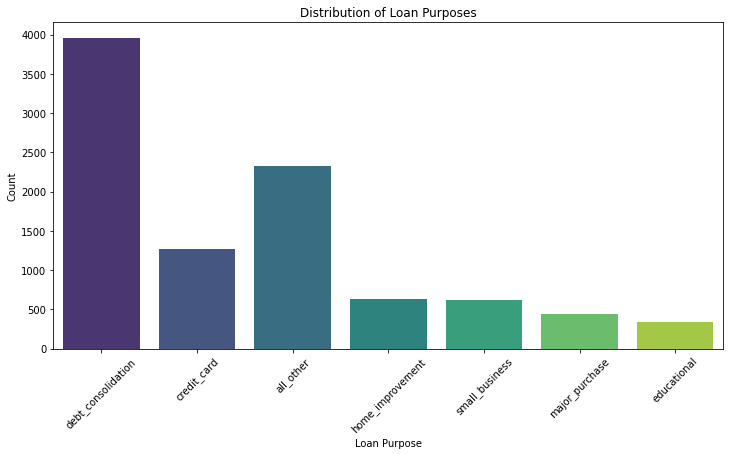

In [150]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=df, palette='viridis')
plt.title('Distribution of Loan Purposes')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Interest Rate Vs FICO Score

Checking the relationship between FICO score and interest rates.

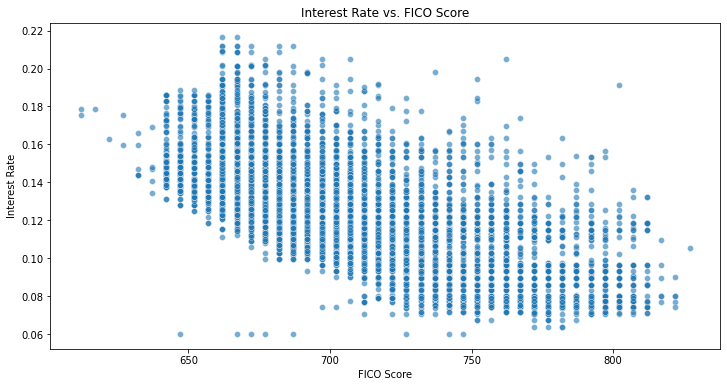

In [151]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='fico', y='int.rate', data=df, alpha=0.6)
plt.title('Interest Rate vs. FICO Score')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()


### Debt-to-Income Ratio Distribution

Analyzing the distribution of debt-to-income ratios among the borrowers.

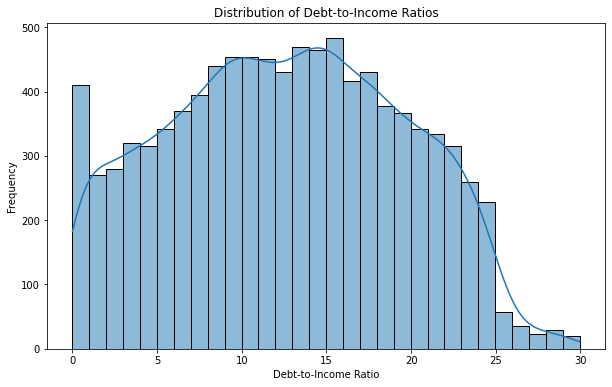

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(df['dti'], bins=30, kde=True)
plt.title('Distribution of Debt-to-Income Ratios')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()


### Loan Status by Purpose

Exploring how loan purposes relate to the loan repayment status

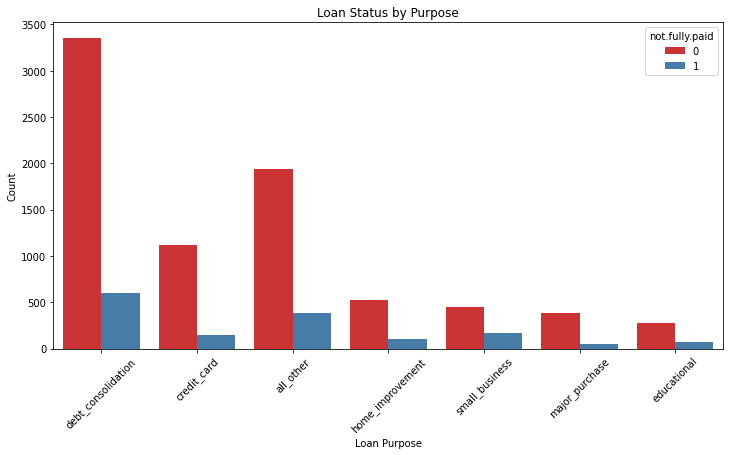

In [153]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set1')
plt.title('Loan Status by Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### Inquiries in the Last 6 Months

Analyzing the distribution of the number of inquiries in the last 6 months

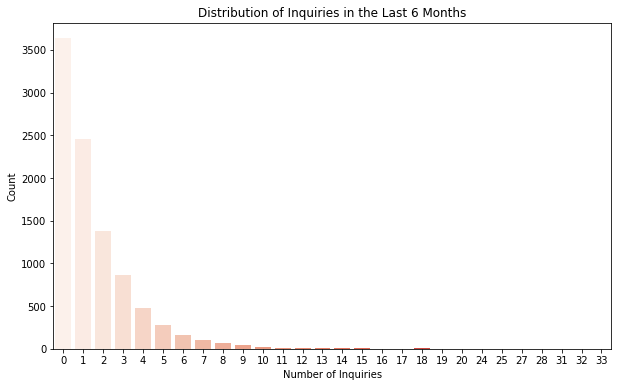

In [154]:
plt.figure(figsize=(10, 6))
sns.countplot(x='inq.last.6mths', data=df, palette='Reds')
plt.title('Distribution of Inquiries in the Last 6 Months')
plt.xlabel('Number of Inquiries')
plt.ylabel('Count')
plt.show()


# Model Evalution

In [155]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

### Converting categorical variable 'purpose' into dummy variables

In [156]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

### Define features (X) and target variable (y)


In [157]:
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

### Split the data into training and testing sets

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Machine Learning Models

### Linear Regression

In [159]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

### Logistic Regression

In [160]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

### Decision Tree

In [161]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_predictions = decision_tree_model.predict(X_test)

### Random Forest

In [162]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)


### Evaluating Models

In [163]:
def evaluate_regression(model, predictions, actual):
    mse = mean_squared_error(actual, predictions)
    r2 = r2_score(actual, predictions)
    print(f"{type(model).__name__} Regression:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("\n" + "="*40 + "\n")
    return r2


In [164]:
def evaluate_classification(model, predictions, actual):
    accuracy = accuracy_score(actual, predictions)
    print(f"Model: {type(model).__name__}")
    print(f"Accuracy: {accuracy:.2%}")
    print("\nClassification Report:")
    print(classification_report(actual, predictions))
    print("\nConfusion Matrix:")
    print(confusion_matrix(actual, predictions))
    print("\n" + "="*40 + "\n")
    return accuracy

### Evaluate Linear Regression

In [165]:
linear=evaluate_regression(linear_model, linear_predictions, y_test)

LinearRegression Regression:
Mean Squared Error: 0.12414579589954722
R-squared: 0.07247068023769332




### Evaluate Logistic Regression

In [166]:
logistic=evaluate_classification(logistic_model, logistic_predictions, y_test)

Model: LogisticRegression
Accuracy: 84.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       1.00      0.00      0.01       305

    accuracy                           0.84      1916
   macro avg       0.92      0.50      0.46      1916
weighted avg       0.87      0.84      0.77      1916


Confusion Matrix:
[[1611    0]
 [ 304    1]]




### Evaluate Decision Tree

In [167]:
tree=evaluate_classification(decision_tree_model, decision_tree_predictions, y_test)

Model: DecisionTreeClassifier
Accuracy: 72.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1611
           1       0.18      0.21      0.19       305

    accuracy                           0.73      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.74      0.73      0.73      1916


Confusion Matrix:
[[1332  279]
 [ 242   63]]




### Evaluate Random Forest

In [168]:
forest=evaluate_classification(random_forest_model, random_forest_predictions, y_test)

Model: RandomForestClassifier
Accuracy: 84.13%

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.53      0.03      0.05       305

    accuracy                           0.84      1916
   macro avg       0.69      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916


Confusion Matrix:
[[1604    7]
 [ 297    8]]




# Conclusion

##### Linear Regression:

Achieved an R-squared value of  0.0724, indicating relatively low level of goodness of fit

##### Logistic Regression:

Achieved an accuracy of 84.13%, demonstrating the model's effectiveness in classifying fully paid and not fully paid loans.

##### Decision Tree and Random Forest:

Both models showed competitive accuracy, with the Random Forest model potentially outperforming the Decision Tree model.